In [7]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Processing OLS

In this first section, we will construct a linear model of to predict the household prices of California from the 1990s.

In [8]:
california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)

df['MedHouseVal'] = california.target

In [10]:
df.mean()

MedInc            3.870671
HouseAge         28.639486
AveRooms          5.429000
AveBedrms         1.096675
Population     1425.476744
AveOccup          3.070655
Latitude         35.631861
Longitude      -119.569704
MedHouseVal       2.068558
dtype: float64

## Data Exploration

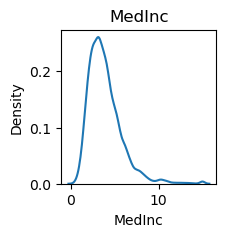

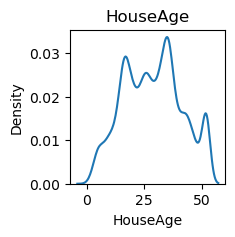

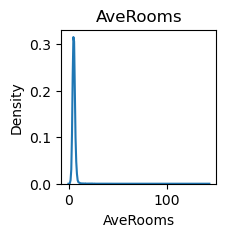

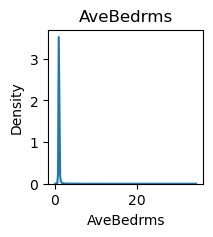

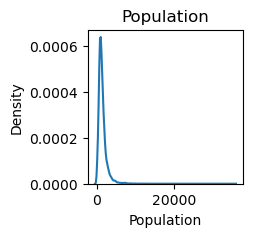

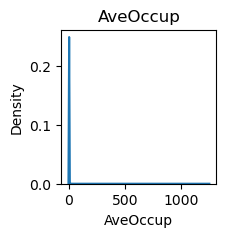

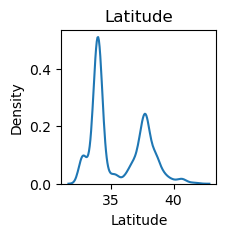

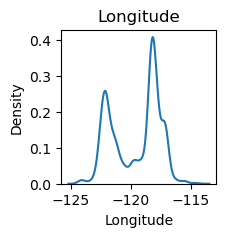

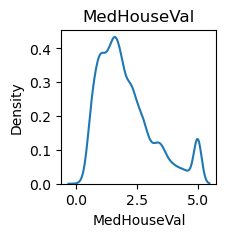

In [11]:
for c in df.columns:
    plt.figure(figsize=(2,2))
    sns.kdeplot(df[c])
    plt.title(c)

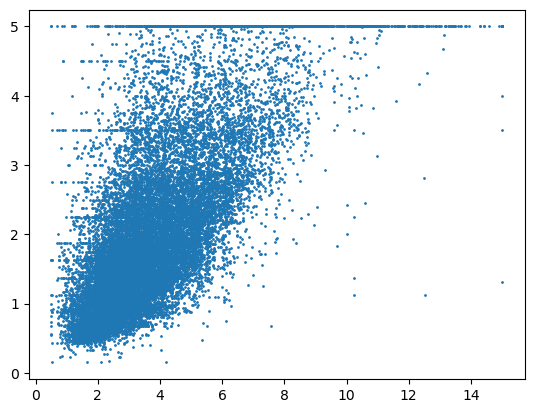

In [22]:
plt.scatter(df.MedInc, df.MedHouseVal, s=1)

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

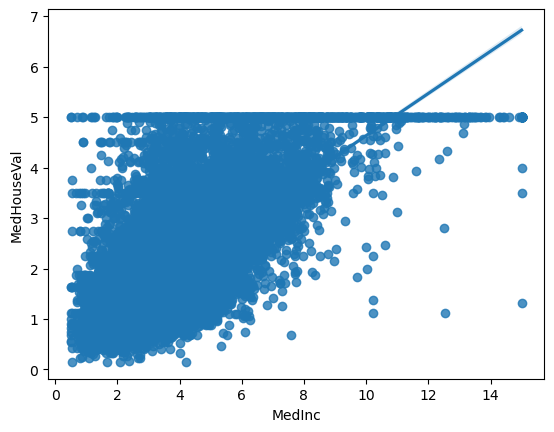

In [25]:
sns.regplot(x= df.MedInc,y= df.MedHouseVal, )

### Model Building (for next time)

In [12]:
# Define the independent variables
X = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]]

# Define the dependent variable 
y = df['MedHouseVal']

# Add a constant (intercept)
X = sm.add_constant(X)

In [15]:
# Fit the OLS regression model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

In [16]:
# Display the summary of the results
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Tue, 23 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:53:13   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.0

## Plot Forest

In [17]:
## This code block simply processes the dataframe for you
R = results = ols_results.summary().tables[1].data
R = pd.DataFrame(R)
R.columns = R.iloc[0]
R = R.iloc[1:]
R[R.columns[1:]] = R[R.columns[1:]].astype(float)
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)

p = 0.1
R["alpha"] = (R.p_val < 0.05 ) * (1-p) + p

''

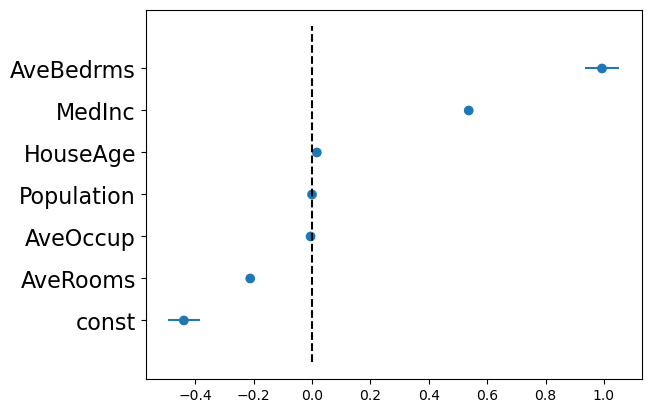

In [19]:
plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)

plt.vlines(0,0-1,len(R), linestyle="--", color = "black")

plt.yticks(R.index,R.vari, fontsize=16)
""